In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')




### Reading data from source file


In [2]:
df=pd.read_csv('Railofy_training_data_for_model.csv')

### Displays first 5 lines

In [3]:
df.head()

,pk,QT,GRCA,CCA,JD,ODD,JS,ODS,SL,NDTD,...,GRA,CURA,RPW,CUCA,CAR,BKT_2,CL_1,CL_2,CL_3,target
0,88315053602,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.016290,...,1.341754,1.820791,0.280196,-0.007556,1.091054,0,0,1,0,0
1,88315053603,GN,1.400436,0.610522,0.667146,0.930870,0.709433,0.800000,1,0.024623,...,1.999409,3.810137,0.276128,-0.007556,1.143376,0,0,1,0,0
2,88314793081,GN,0.728882,0.524062,1.365898,0.885873,1.463205,0.767442,0,0.004357,...,0.618700,0.742814,0.278101,0.435419,5.000000,0,0,0,0,0
3,88312760631,GN,5.000000,5.000000,0.298977,0.764192,0.354716,0.800000,0,0.003798,...,1.117669,1.079367,0.266220,0.091167,5.000000,1,0,0,0,1
4,88312449843,GN,0.614226,0.389327,0.699606,0.917133,1.108489,0.862069,1,0.024571,...,4.393867,5.000000,0.277710,2.103696,1.454895,1,0,1,0,0


### Data Information

GRCA: General Reservation Current Availability

Indicates the number of currently available seats in the general reservation category.

CCA: Current Charted Availability

The number of seats available after the chart has been prepared.

JD: Journey Date

The date of the journey for which the ticket is booked.

ODD: Origin-Destination Distance

The distance between the boarding station and the destination station.

JS: Journey Start

The time when the journey begins.

ODS: Origin-Destination Station

Code or indicator of the stations involved in the journey.

SL: Sleeper Class

Indicates the number of seats or bookings in the Sleeper Class.

NDTD: Number of Days to Travel Date

The number of days left until the journey date from the date of booking.

CURP: Current Upgraded Reservation Percentage

The percentage of reservations that have been upgraded (e.g., from RAC to confirmed).

GROP: General Reservation Occupancy Percentage

The percentage of general reservation seats occupied.

CANP: Cancellation Percentage

The percentage of tickets that have been canceled.

SBRA: Sleeper Berth Reservation Availability

Availability of sleeper berths at the time of query.

SCRA: Sleeper Class Reservation Availability

Number of available seats in the Sleeper Class.

GRA: General Reservation Availability

Indicates the availability of seats in the general category.

CURA: Current Upgraded Reservation Availability

Number of available upgraded reservations.

RPW: Reservation Probability Weight

A calculated weight indicating the likelihood of reservation confirmation.

CUCA: Current Unreserved Seat Availability

Number of unreserved seats available currently.

CAR: Confirmed Against RAC

Number of RAC tickets that have been confirmed.

BKT_2: Bucket 2

Could represent a specific category or quota bucket used in allocation.

CL_1: Class 1

Number of bookings or availability in the highest travel class (could be AC First Class).

CL_2: Class 2

Number of bookings or availability in the second-highest travel class (could be AC 2-Tier).

CL_3: Class 3

Number of bookings or availability in the third-highest travel class (could be AC 3-Tier).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36775 entries, 0 to 36774
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pk      36775 non-null  int64  
 1   QT      36775 non-null  object 
 2   GRCA    36775 non-null  float64
 3   CCA     36775 non-null  float64
 4   JD      36775 non-null  float64
 5   ODD     36775 non-null  float64
 6   JS      36775 non-null  float64
 7   ODS     36775 non-null  float64
 8   SL      36775 non-null  int64  
 9   NDTD    36775 non-null  float64
 10  CURP    36775 non-null  float64
 11  GROP    36775 non-null  float64
 12  CANP    36775 non-null  float64
 13  SBRA    36775 non-null  float64
 14  SCRA    36775 non-null  float64
 15  GRA     36775 non-null  float64
 16  CURA    36775 non-null  float64
 17  RPW     36775 non-null  float64
 18  CUCA    36775 non-null  float64
 19  CAR     36775 non-null  float64
 20  BKT_2   36775 non-null  int64  
 21  CL_1    36775 non-null  int64  
 22

### Displays the number of rows and columns in the dataframe

In [5]:
df.shape

(36775, 25)

### Displays statistical information about the dataframe

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pk,36775.0,9.779557e+10,1.642729e+11,2.119454e+10,2.807045e+10,6.400895e+10,8.450154e+10,8.831011e+11
GRCA,36775.0,2.111787e+00,1.620523e+00,8.189685e-03,4.913811e-01,1.965524e+00,3.513375e+00,5.000000e+00
CCA,36775.0,2.316864e+00,1.586308e+00,7.590947e-03,9.234182e-01,2.061221e+00,3.656655e+00,5.000000e+00
JD,36775.0,8.669273e-01,4.964743e-01,1.708441e-02,4.544452e-01,7.722151e-01,1.294144e+00,3.542452e+00
ODD,36775.0,7.836196e-01,2.435820e-01,1.218324e-02,6.451104e-01,8.804411e-01,9.970030e-01,1.020475e+00
JS,36775.0,7.653929e-01,5.174971e-01,4.433955e-02,3.990560e-01,6.650933e-01,9.754701e-01,3.547164e+00
ODS,36775.0,6.894013e-01,2.435523e-01,1.298701e-02,5.185185e-01,7.500000e-01,9.047619e-01,9.876543e-01
SL,36775.0,8.746431e-01,3.311277e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
NDTD,36775.0,2.737148e-02,2.745667e-02,0.000000e+00,8.318239e-03,1.666618e-02,3.604837e-02,1.277945e-01
CURP,36775.0,4.462030e-01,4.113701e-01,6.341150e-04,2.542373e-01,3.750000e-01,5.000000e-01,3.000000e+00


### Automatic Exploratory Data Analysis

In [7]:
import sweetviz as sv
report = sv.analyze(df)

# Save the report to an HTML file
report.show_html("sweetviz_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Checking for Null values

In [8]:
df.isnull().sum()

pk        0
QT        0
GRCA      0
CCA       0
JD        0
ODD       0
JS        0
ODS       0
SL        0
NDTD      0
CURP      0
GROP      0
CANP      0
SBRA      0
SCRA      0
GRA       0
CURA      0
RPW       0
CUCA      0
CAR       0
BKT_2     0
CL_1      0
CL_2      0
CL_3      0
target    0
dtype: int64

### Checking the distribution of label and other categorical columns

<AxesSubplot: >

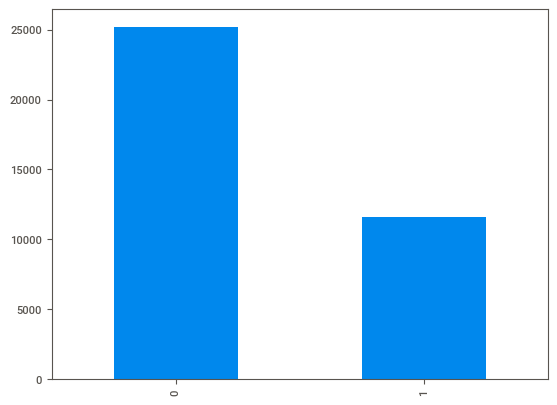

In [9]:
df['target'].value_counts().plot(kind='bar')

<AxesSubplot: >

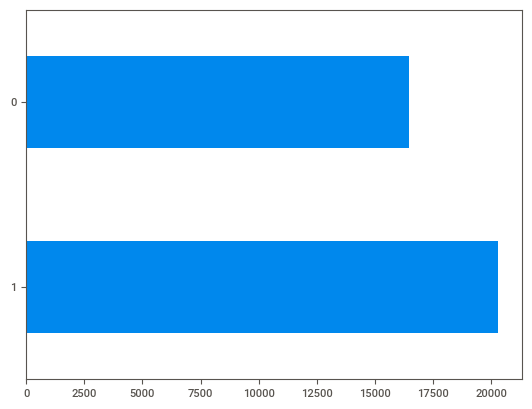

In [10]:
df['CL_1'].value_counts().plot(kind='barh')

<AxesSubplot: >

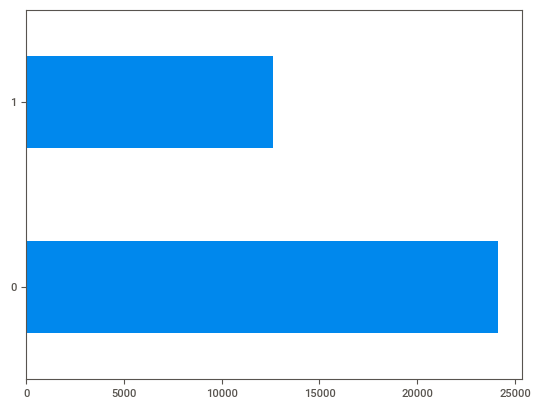

In [11]:
df['CL_2'].value_counts().plot(kind='barh')

<AxesSubplot: >

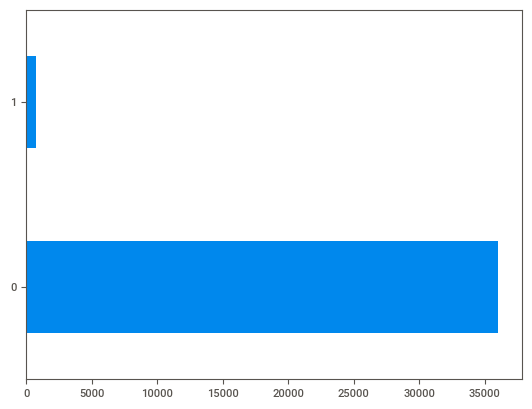

In [12]:
df['CL_3'].value_counts().plot(kind='barh')

<AxesSubplot: >

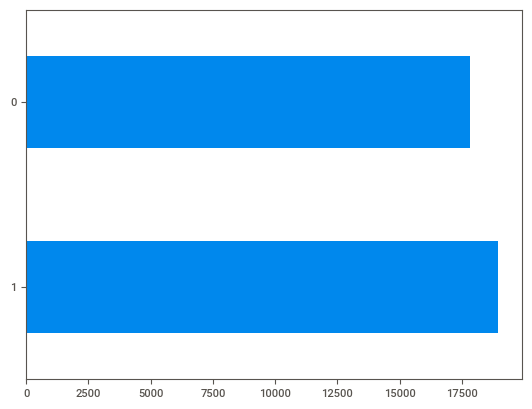

In [13]:
df['BKT_2'].value_counts().plot(kind='barh')

<AxesSubplot: >

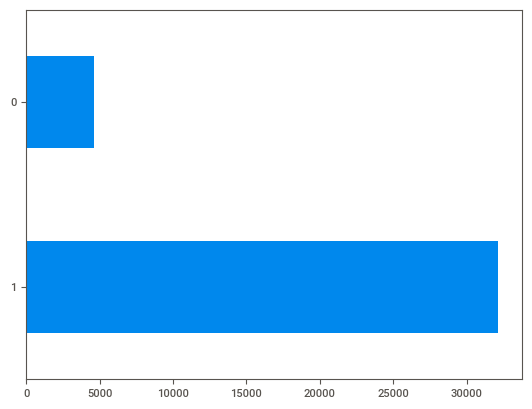

In [14]:
df['SL'].value_counts().plot(kind='barh')

<AxesSubplot: >

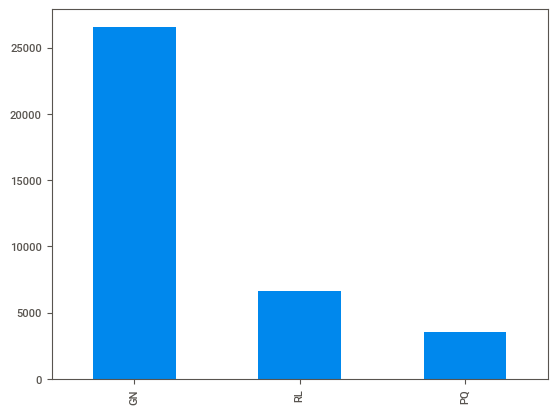

In [15]:
df['QT'].value_counts().plot(kind='bar')

### Dropping pk column as it doesnt add value in analysing the dataset

In [16]:
df.drop('pk',axis=1,inplace=True)

In [17]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42,stratify=y)

In [64]:
num_cols=X_train.select_dtypes(exclude='object').columns
num_cols=num_cols.drop(['SL','BKT_2','CL_1','CL_2','CL_3'])


In [65]:
print(num_cols)

Index(['GRCA', 'CCA', 'JD', 'ODD', 'JS', 'ODS', 'NDTD', 'CURP', 'GROP', 'CANP',
       'SBRA', 'SCRA', 'GRA', 'CURA', 'RPW', 'CUCA', 'CAR'],
      dtype='object')


### Label encoding of the column QT

In [66]:
X_train['QT']=X_train['QT'].replace({'GN':0,'RL':1,'PQ':2})

### Figuring out the outliers using boxplots

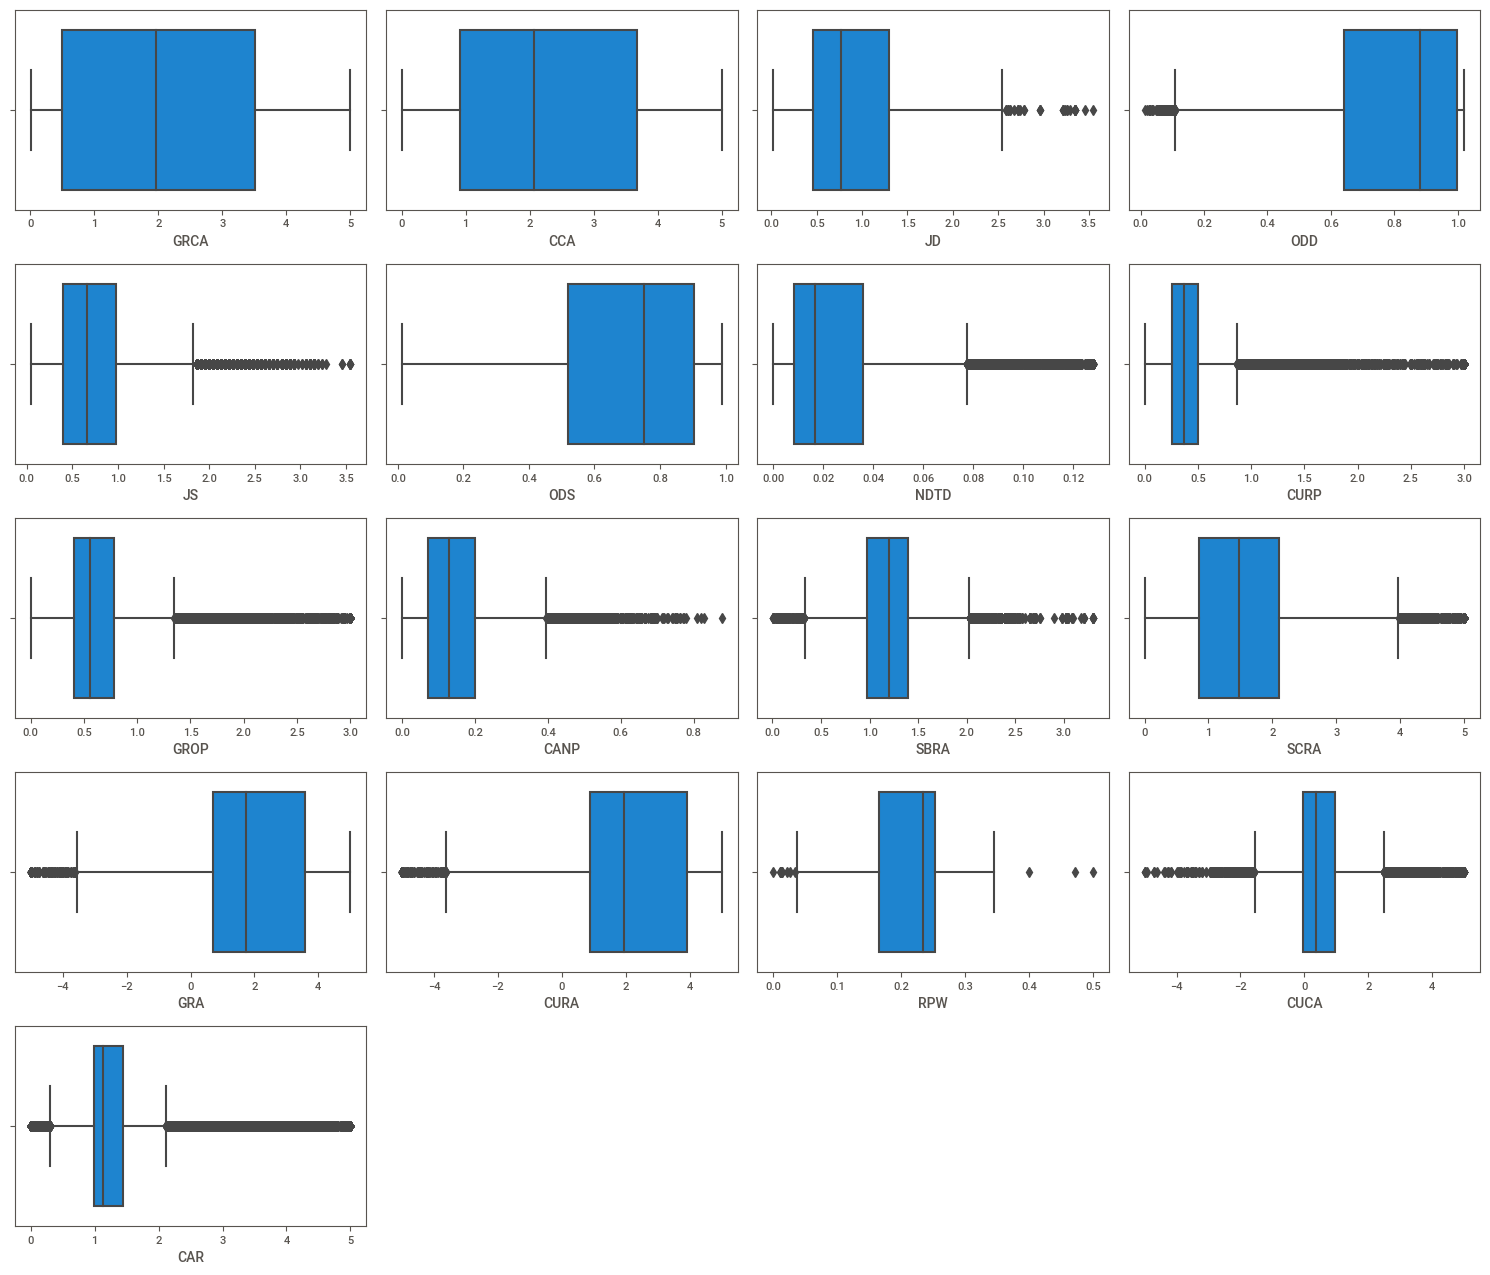

In [67]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for i in num_cols:
    ax=plt.subplot(6,4,plotnumber)
    sns.boxplot(X_train[i])
    plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()

### Outlier capping 

In [68]:
def outlier_capping(dataframe: pd.DataFrame, outliers:list):
    df = dataframe.copy()
    for i in outliers:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + 1.5 *iqr
        lower_limit = q1 - 1.5 *iqr
        df.loc[df[i] >upper_limit, i] = upper_limit
        df.loc[df[i] <lower_limit, i] = lower_limit
    return df

X_train = outlier_capping(dataframe = X_train, outliers = X_train.columns)

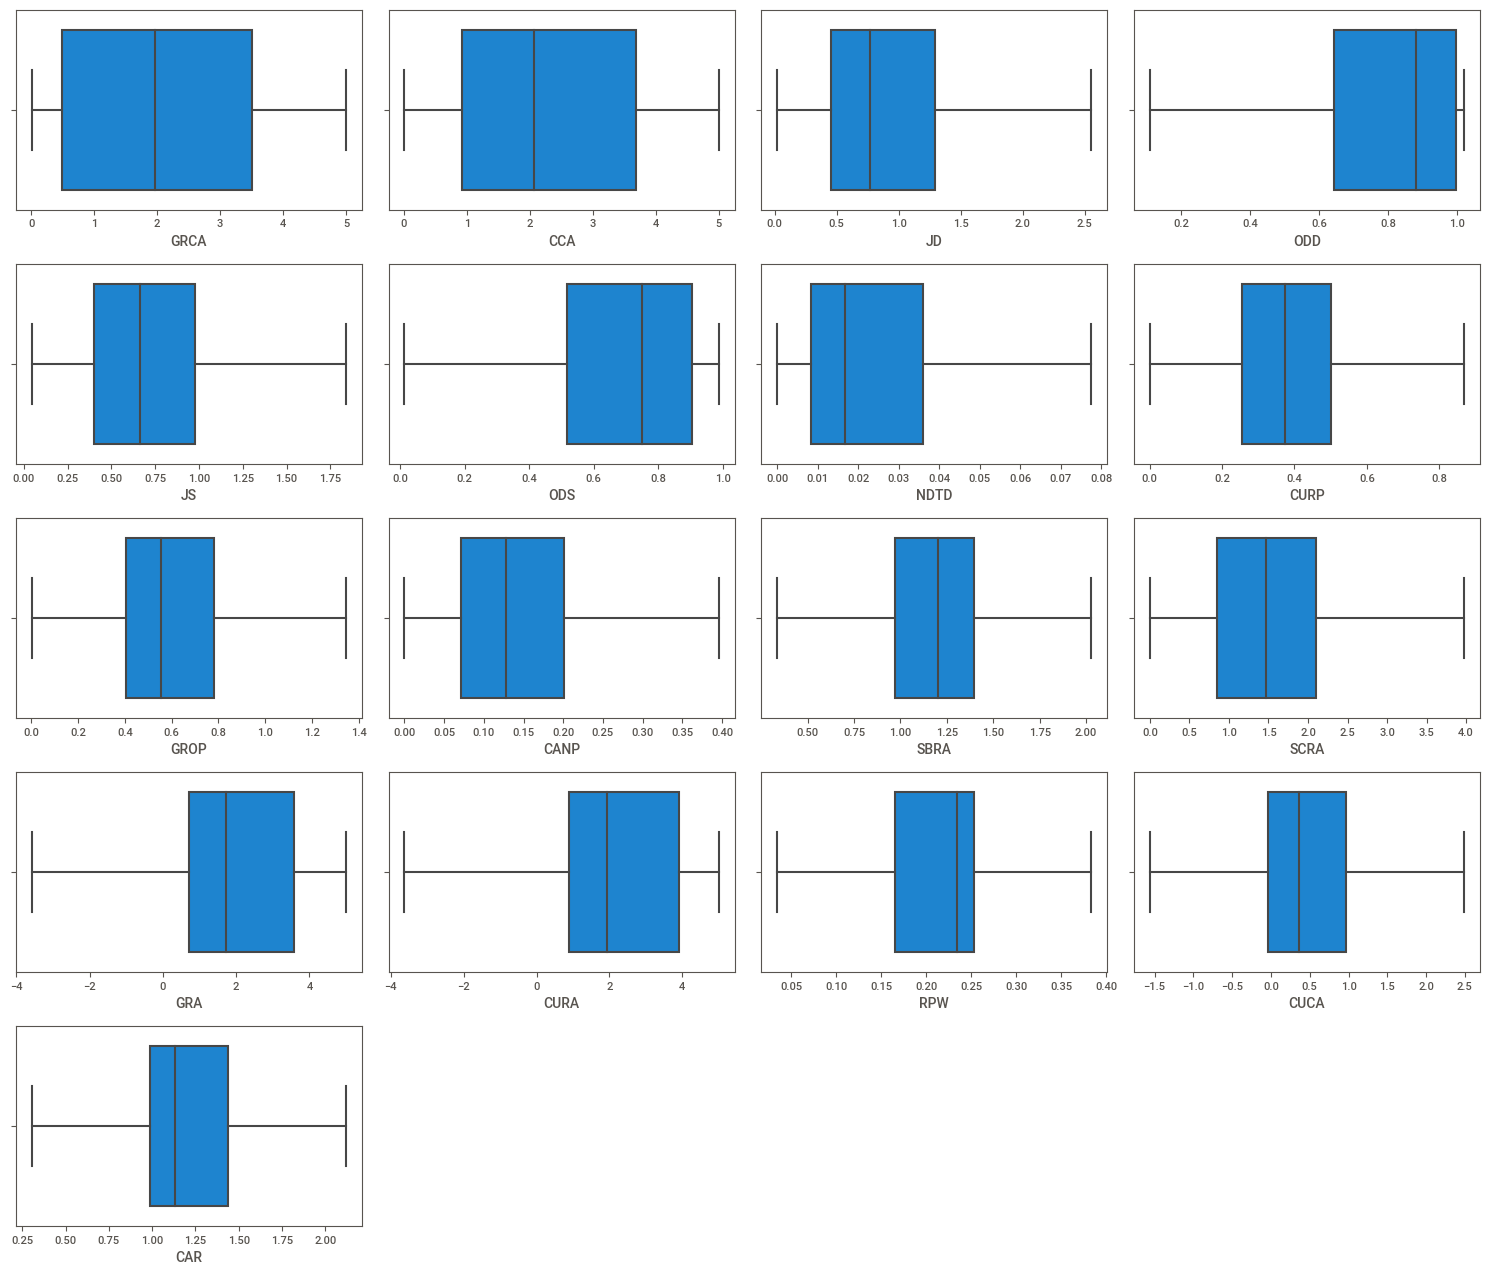

In [69]:
plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for i in num_cols:
    ax=plt.subplot(6,4,plotnumber)
    sns.boxplot(X_train[i])
    plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.tight_layout()
plt.show()


### Correlation coefficient using heatmap

<AxesSubplot: >

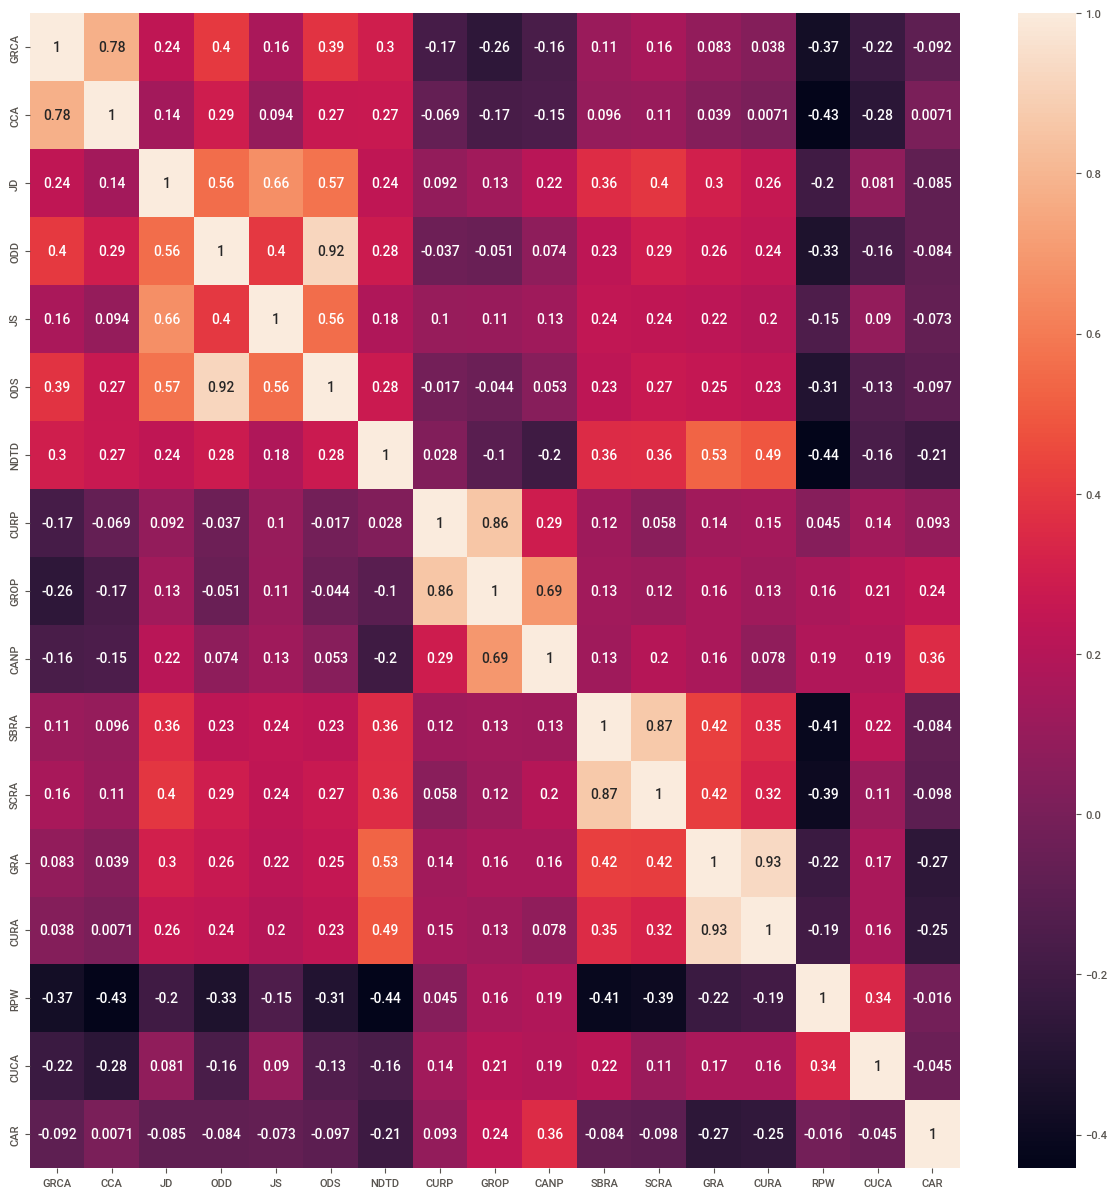

In [70]:

plt.figure(figsize = (15,15), facecolor = 'white')
sns.heatmap(X_train[num_cols].corr(),annot=True)


In [71]:
threshold=0.9
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
                
    return col_corr

In [72]:
correlation(X_train.iloc[:,:-1],threshold)

{'CURA', 'ODS'}

### Feature Selection using ExtraTreesClassifier

In [73]:
from sklearn.ensemble import ExtraTreesClassifier


In [74]:
model=ExtraTreesClassifier()
model.fit(X_train,y_train)

ExtraTreesClassifier()

In [75]:
model.feature_importances_

array([0.02617401, 0.05322996, 0.05017029, 0.04954355, 0.05238348,
       0.04620389, 0.04711372, 0.        , 0.04919195, 0.10316821,
       0.11023923, 0.05031352, 0.04684555, 0.04617872, 0.03899391,
       0.03667212, 0.05024916, 0.05672781, 0.03819764, 0.02072211,
       0.01320393, 0.01447723, 0.        ])

### Checking the most important 12 features

<AxesSubplot: >

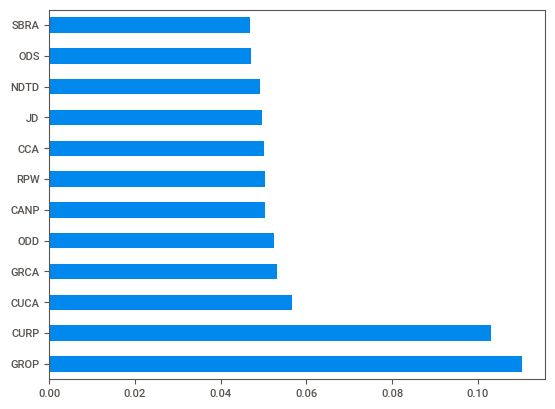

In [76]:
ranked_features=pd.Series(model.feature_importances_,index=X_train.columns)
ranked_features.nlargest(12).plot(kind='barh')

In [77]:
ranked_features.nlargest(12)

GROP    0.110239
CURP    0.103168
CUCA    0.056728
GRCA    0.053230
ODD     0.052383
CANP    0.050314
RPW     0.050249
CCA     0.050170
JD      0.049544
NDTD    0.049192
ODS     0.047114
SBRA    0.046846
dtype: float64

### Feature Selection using Mutual info Classifier

In [78]:
from sklearn.feature_selection import mutual_info_classif

In [79]:
mutual_info=mutual_info_classif(X_train,y_train)

In [80]:
mutual_data=pd.Series(mutual_info,index=X_train.columns)
mutual_data.sort_values(ascending=False)

CUCA     0.228058
GROP     0.213402
CCA      0.186205
SCRA     0.178174
SBRA     0.176415
ODD      0.150586
CURP     0.099277
JD       0.087060
GRCA     0.053932
CANP     0.049059
RPW      0.048772
NDTD     0.046178
ODS      0.035828
CURA     0.034082
GRA      0.031398
QT       0.021409
SL       0.007394
CL_2     0.005264
BKT_2    0.004790
CAR      0.004207
CL_1     0.003463
JS       0.003241
CL_3     0.000930
dtype: float64

### Both the methods display the same features highlighting their importance

In [81]:
features=ranked_features.nlargest(12).index

In [82]:
features

Index(['GROP', 'CURP', 'CUCA', 'GRCA', 'ODD', 'CANP', 'RPW', 'CCA', 'JD',
       'NDTD', 'ODS', 'SBRA'],
      dtype='object')

### Using the top features for model development and prediction

In [83]:
X_train_new=X_train[features]

In [84]:
X_train_new

,GROP,CURP,CUCA,GRCA,ODD,CANP,RPW,CCA,JD,NDTD,ODS,SBRA
35556,0.550000,0.366667,0.355883,0.491381,0.692939,0.118280,0.247461,0.881123,0.720962,0.016666,0.645161,1.816500
23662,1.050000,0.600000,-0.754608,0.163794,0.643172,0.219512,0.251570,0.447175,0.249432,0.004160,0.545455,0.335569
35640,1.300000,0.766667,0.691803,0.245691,0.137725,0.231884,0.196653,0.801065,0.196471,0.010902,0.190476,0.987653
18256,0.450472,0.318396,0.054776,3.472426,0.966374,0.114519,0.249005,4.046995,0.564640,0.008289,0.842105,0.606544
2730,0.956767,0.609023,0.703383,4.356912,0.967928,0.213626,0.255148,2.924077,1.289018,0.024999,0.800000,1.060177
...,...,...,...,...,...,...,...,...,...,...,...,...
32127,1.120879,0.736264,2.491647,0.745261,0.910950,0.217391,0.233311,0.389524,1.712712,0.024849,0.781250,1.631720
29471,0.283333,0.183333,-1.425738,0.491381,0.394079,0.077922,0.256538,1.207709,0.659458,0.051600,0.428571,0.804068
17484,0.867089,0.566456,0.449747,2.587940,0.946372,0.211111,0.280196,0.923845,0.512532,0.005274,0.950000,0.791952
14945,0.805310,0.592920,1.594619,0.925434,1.000000,0.133333,0.232735,0.912913,0.871305,0.075643,0.928571,1.319826


### Applying the same set of preprocessing steps to the validation set as well

In [85]:
X_test['QT']=X_test['QT'].replace({'GN':0,'RL':1,'PQ':2})

In [86]:
X_test = outlier_capping(dataframe = X_test, outliers = X_test.columns)

In [87]:
X_test_new=X_test[features]

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [89]:
from sklearn.metrics import f1_score,matthews_corrcoef,confusion_matrix    # imbalanced dataset

In [90]:
def check_model_performance(X_train,y_train,X_test,y_test):
    models={'Logistic Regression':LogisticRegression(),
           'Support Vector Classifier': SVC(),
           'K Nearest Neighbors Classifier': KNeighborsClassifier(),
           'Random Forest Classifier':RandomForestClassifier(max_depth=5),
           'Extra Gradient Boosting Classifier':XGBClassifier(learning_rate=0.1),
           'Decision Tree Classifier': DecisionTreeClassifier(max_depth=5)}
    for model_name,model in models.items():
        
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        f1score=f1_score(y_pred,y_test)
        mcc=matthews_corrcoef(y_pred,y_test)
        
        print(f"{model_name}-\n f1_score: {f1score:.2f} \n Matthews Correlation Co-efficient: {mcc:.2f}")
        print(confusion_matrix(y_pred,y_test))
        print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')


In [91]:
check_model_performance(X_train_new,y_train,X_test_new,y_test)



Logistic Regression-
 f1_score: 0.47 
 Matthews Correlation Co-efficient: 0.34
[[7634 2449]
 [ 681 1372]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Support Vector Classifier-
 f1_score: 0.45 
 Matthews Correlation Co-efficient: 0.36
[[7846 2559]
 [ 469 1262]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
K Nearest Neighbors Classifier-
 f1_score: 0.72 
 Matthews Correlation Co-efficient: 0.60
[[7440 1169]
 [ 875 2652]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Random Forest Classifier-
 f1_score: 0.55 
 Matthews Correlation Co-efficient: 0.42
[[7557 2080]
 [ 758 1741]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Extra Gradient Boosting Classifier-
 f1_score: 0.70 
 Matthews Correlation Co-efficient: 0.58
[[7639 1416]
 [ 676 2405]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Decision Tree

### K Nearest neighbors and Extra gradient boosting perform better than all other models. Let us use hyperparameters on top of these models to further enhance their performance 

In [92]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'n_neighbors':[3,5,7,10],
    'weights':['distance','uniform'],
    'algorithm':['ball_tree','kd_tree'],
    'leaf_size':[20,30,40],
    'p':[1,2]}

kneigh=KNeighborsClassifier()
grid=GridSearchCV(kneigh,param_grid,scoring='accuracy',cv=5,verbose=1)
grid.fit(X_train_new,y_train)






Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'leaf_size': [20, 30, 40],
                         'n_neighbors': [3, 5, 7, 10], 'p': [1, 2],
                         'weights': ['distance', 'uniform']},
             scoring='accuracy', verbose=1)

In [93]:
grid.best_params_




{'algorithm': 'ball_tree',
 'leaf_size': 20,
 'n_neighbors': 5,
 'p': 1,
 'weights': 'distance'}

In [94]:
grid.best_score_




0.9053127446432196

In [95]:
grid.best_estimator_.score(X_test_new, y_test)

y_pred = grid.best_estimator_.predict(X_test_new)
print(f1_score(y_test, y_pred))
print(confusion_matrix(y_pred,y_test))



0.8723068838675775
[[7844  501]
 [ 471 3320]]


In [96]:
matthews_corrcoef(y_pred,y_test)

0.81397828476023

### Observations:
#### - False negatives and False positives have reduced to a greater number with 87% f1_score and 81 % Matthews Correlation coefficient

In [97]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1,0.001],
    'max_depth': [3, 5, 7],
    'gamma': [0, 0.1, 0.2]
    
}

xgb=XGBClassifier()
xgbgrid=GridSearchCV(xgb,xgb_param_grid,scoring='accuracy',cv=5,verbose=1)
xgbgrid.fit(X_train_new,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.1, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [98]:

xgbgrid.best_params_

{'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}

In [99]:
xgbgrid.best_score_

0.8766184013875307

In [100]:
xgbgrid.best_estimator_.score(X_test_new, y_test)

y_pred = xgbgrid.best_estimator_.predict(X_test_new)
f1_score(y_test, y_pred)


0.8101755841283008

In [101]:
matthews_corrcoef(y_pred,y_test)

0.7323354913899318

In [102]:
print(confusion_matrix(y_pred,y_test))

[[7833  891]
 [ 482 2930]]


### Observations:
#### - False negatives and False positives are more when compared to KNN with 81% f1_score and 73 % Matthews Correlation coefficient

In [103]:
import joblib
joblib.dump(grid, 'PNR_Confirmation.pkl')

['PNR_Confirmation.pkl']

# KNN gives the best f1 score 87.2% and best matthews_corrcoef 81.5%